In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt 
from matplotlib import style

In [2]:
#iris = datasets.load_iris()
pokemon= pd.read_excel('Pokemon.xlsx')
#data = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
#                    columns = iris['feature_names'] + ['target'])
data= pokemon.copy()
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
data=data.drop(['#','Name', 'Type 2','Generation'], axis=1)
data.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Grass,318,45,49,49,65,65,45,False
1,Grass,405,60,62,63,80,80,60,False
2,Grass,525,80,82,83,100,100,80,False
3,Grass,625,80,100,123,122,120,80,False
4,Fire,309,39,52,43,60,50,65,False


In [4]:
kproto = KPrototypes(n_clusters = 6, init = 'Cao', n_init = 1, verbose = True)
kproto.fit_predict(data.values, categorical = [0,8])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 198, ncost: 3250793.113315296
Run: 1, iteration: 2/100, moves: 78, ncost: 3187145.057112411
Run: 1, iteration: 3/100, moves: 45, ncost: 3159866.8264045217
Run: 1, iteration: 4/100, moves: 27, ncost: 3152462.1737777246
Run: 1, iteration: 5/100, moves: 8, ncost: 3149673.433030329
Run: 1, iteration: 6/100, moves: 8, ncost: 3148170.570581539
Run: 1, iteration: 7/100, moves: 9, ncost: 3146229.6544608306
Run: 1, iteration: 8/100, moves: 8, ncost: 3144517.31689283
Run: 1, iteration: 9/100, moves: 9, ncost: 3142680.084901745
Run: 1, iteration: 10/100, moves: 10, ncost: 3138156.8272300833
Run: 1, iteration: 11/100, moves: 9, ncost: 3135289.252163089
Run: 1, iteration: 12/100, moves: 10, ncost: 3133864.6166299838
Run: 1, iteration: 13/100, moves: 4, ncost: 3133108.917090183
Run: 1, iteration: 14/100, moves: 1, ncost: 3133038.8460411406
Run: 1, iteration: 15/100, moves: 3, ncost: 31327

array([5, 2, 0, 4, 5, 2, 0, 4, 4, 5, 2, 0, 4, 5, 5, 2, 5, 5, 2, 3, 5, 2,
       3, 4, 5, 2, 5, 2, 5, 2, 5, 0, 5, 3, 5, 2, 3, 5, 2, 3, 5, 0, 5, 0,
       5, 2, 5, 3, 5, 2, 0, 5, 2, 5, 0, 5, 2, 5, 2, 5, 0, 5, 3, 2, 0, 5,
       2, 3, 5, 2, 0, 4, 5, 2, 3, 5, 2, 3, 5, 0, 5, 2, 3, 2, 0, 5, 3, 1,
       5, 0, 2, 5, 3, 5, 3, 5, 3, 5, 1, 5, 2, 0, 4, 2, 5, 0, 5, 3, 5, 0,
       5, 0, 5, 2, 3, 3, 2, 5, 3, 2, 3, 3, 2, 3, 4, 5, 2, 5, 3, 5, 0, 0,
       3, 0, 0, 0, 3, 4, 3, 5, 3, 4, 0, 5, 5, 0, 0, 0, 2, 2, 0, 2, 3, 0,
       4, 3, 4, 4, 4, 5, 2, 4, 4, 4, 4, 4, 5, 2, 0, 5, 2, 0, 5, 2, 3, 5,
       2, 5, 2, 5, 2, 5, 2, 0, 5, 3, 5, 5, 5, 5, 2, 5, 0, 5, 2, 0, 4, 3,
       5, 2, 2, 0, 5, 5, 3, 2, 5, 2, 2, 5, 2, 0, 1, 2, 0, 2, 5, 2, 3, 5,
       3, 2, 2, 1, 1, 5, 3, 2, 3, 4, 1, 3, 4, 2, 5, 3, 5, 2, 5, 3, 2, 5,
       3, 5, 0, 3, 5, 0, 4, 0, 5, 3, 0, 3, 5, 5, 3, 5, 2, 2, 3, 0, 4, 4,
       4, 5, 2, 4, 4, 4, 4, 4, 5, 2, 0, 4, 5, 2, 0, 4, 5, 2, 3, 4, 5, 2,
       5, 2, 5, 5, 2, 5, 2, 5, 5, 0, 5, 5, 3, 5, 2,

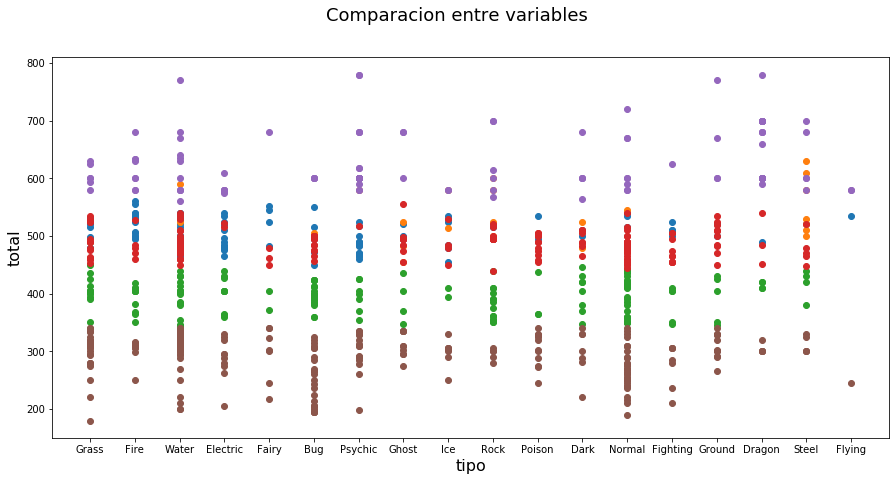

In [5]:
plt.figure(figsize=(15,7))
for i in set(kproto.labels_):
    index = kproto.labels_ == i
    plt.plot(data.iloc[index, 0], data.iloc[index, 1], 'o')
    plt.suptitle('Comparacion entre variables', fontsize=18)
    plt.xlabel('tipo', fontsize=16)
    plt.ylabel('total', fontsize=16)
plt.show()

In [6]:
kproto.cluster_centroids_

[array([[508.56637168,  77.34513274,  76.76106195,  75.39823009,
         102.36283186,  90.21238938,  86.48672566],
        [537.53846154,  66.42307692,  78.73076923, 159.03846154,
          68.03846154, 121.23076923,  44.07692308],
        [396.75925926,  64.84567901,  69.9382716 ,  67.77160494,
          65.18518519,  65.04320988,  63.97530864],
        [486.29299363,  84.78980892, 102.39490446,  85.47133758,
          68.06369427,  75.13375796,  70.43949045],
        [628.01834862,  90.7706422 , 120.64220183,  95.99082569,
         119.34862385,  99.60550459, 101.66055046],
        [289.96137339,  48.19313305,  51.17596567,  49.60515021,
          45.77253219,  47.15021459,  48.06437768]]),
 array([['Water', 'False'],
        ['Steel', 'False'],
        ['Normal', 'False'],
        ['Normal', 'False'],
        ['Dragon', 'True'],
        ['Water', 'False']], dtype='<U6')]

In [7]:
kproto?